<a href="https://colab.research.google.com/github/Essra-Hmida/pets_health_API/blob/main/D%C3%A9veloppement%20de%20mod%C3%A9le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prétraitement**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder


# Charger le fichier Excel
df = pd.read_excel("data.xlsx")

# Encodage des variables catégorielles
le = LabelEncoder()

# Encodage de 'Espèce'
df['Espèce'] = le.fit_transform(df['Espèce'])

# Encodage de 'Race'
df['Race'] = le.fit_transform(df['Race'])

# Encodage de 'Maladie'
df['Maladie'] = le.fit_transform(df['Maladie'])

# Enregistrer les données encodées dans un nouveau fichier Excel
df.to_excel("pet_health_data.xlsx", index=False)

# **Etude de corrélation entre les variables**



                      Espèce       Âge     Poids      Race  Température  \
Espèce              1.000000 -0.032735  0.662337  0.033096    -0.038717   
Âge                -0.032735  1.000000  0.017083  0.004417    -0.014530   
Poids               0.662337  0.017083  1.000000 -0.236004     0.001624   
Race                0.033096  0.004417 -0.236004  1.000000    -0.017168   
Température        -0.038717 -0.014530  0.001624 -0.017168     1.000000   
Respiration        -0.622328  0.030260 -0.398244 -0.001172     0.366668   
Pulse              -0.506953 -0.008206 -0.331173 -0.022854     0.283315   
Intensité_activité  0.057651 -0.014918  0.084893 -0.005351    -0.151184   
Score_sommeil       0.011816 -0.001647 -0.014315  0.001796     0.109097   
Maladie             0.043680 -0.052777  0.064533 -0.036527     0.074247   

                    Respiration     Pulse  Intensité_activité  Score_sommeil  \
Espèce                -0.622328 -0.506953            0.057651       0.011816   
Âge           

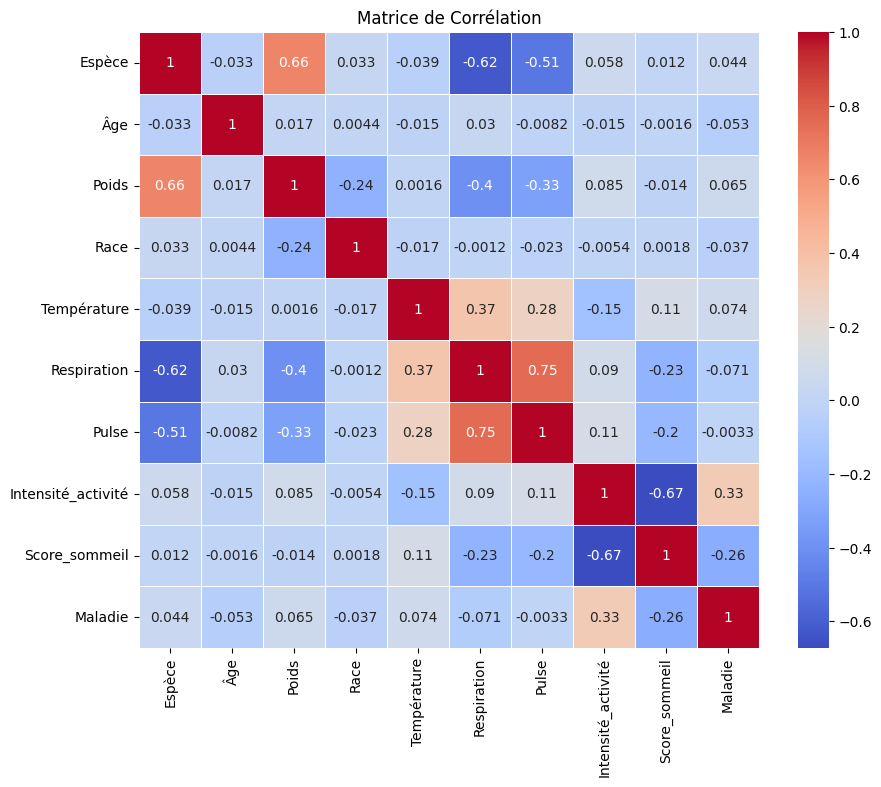

In [ ]:
import pandas as pd
# Charger le fichier Excel
df = pd.read_excel("pet_health_data.xlsx")
corr_matrix = df.corr()
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


# **Entraînement de Modèle GradientBoosting**





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import pickle

# Charger le fichier Excel
df = pd.read_excel("pet_health_data.xlsx")

# Sélectionner les caractéristiques (features) et la variable cible (target)
features = ['Espèce', 'Âge', 'Poids', 'Race', 'Température', 'Respiration', 'Pulse', 'Intensité_activité', 'Score_sommeil']
target = 'Maladie'

X = df[features]
y = df[target]

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Créer le modèle GBM
gbm_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42)

# Entraîner le modèle sur l'ensemble des données d'entraînement
gbm_model.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de validation
y_val_pred = gbm_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Effectuer une validation croisée à 5 plis sur les données d'entraînement
cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=5)
print(f"Validation croisée (5 plis) scores: {cv_scores}")
print(f"Validation croisée (5 plis) score moyen: {cv_scores.mean()}")

# Prédire les étiquettes pour l'ensemble de test
y_test_pred = gbm_model.predict(X_test)

# Évaluer le modèle sur l'ensemble de test
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Enregistrer le modèle GBM entraîné
model_filename = 'gbm_model.pkl'
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(gbm_model, file)
    print(f"Modèle GBM enregistré sous {model_filename}")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du modèle: {e}")

# Enregistrer le scaler utilisé pour normaliser les données
scaler_filename = 'scaler.pkl'
try:
    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Scaler enregistré sous {scaler_filename}")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du scaler: {e}")

# Charger le modèle et le scaler pour vérification
try:
    with open(model_filename, 'rb') as file:
        gbm_model_loaded = pickle.load(file)
    print(f"Modèle GBM chargé depuis {model_filename}")
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {e}")

try:
    with open(scaler_filename, 'rb') as file:
        scaler_loaded = pickle.load(file)
    print(f"Scaler chargé depuis {scaler_filename}")
except Exception as e:
    print(f"Erreur lors du chargement du scaler: {e}")


Validation Accuracy: 0.7424242424242424
Validation Confusion Matrix:
 [[13  0  0  5  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 2  0  0  7  2  0]
 [ 6  1  0  0 11  0]
 [ 0  0  1  0  0  4]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.92      1.00      0.96        12
           2       0.67      1.00      0.80         2
           3       0.58      0.64      0.61        11
           4       0.85      0.61      0.71        18
           5       1.00      0.80      0.89         5

    accuracy                           0.74        66
   macro avg       0.77      0.79      0.77        66
weighted avg       0.76      0.74      0.74        66

Validation croisée (5 plis) scores: [0.79661017 0.75141243 0.75568182 0.72159091 0.72727273]
Validation croisée (5 plis) score moyen: 0.7505136106831023
Test Accuracy: 0.832258064516129
Test Confusion Matrix:
 [[32  0  0  4  

# **Exemple de test**

In [ ]:
import pandas as pd
import joblib

# Charger le modèle et le scaler enregistrés
model_filename = 'gbm_model.pkl'
scaler_filename = 'scaler.pkl'

gbm_model = joblib.load(model_filename)
scaler = joblib.load(scaler_filename)

# Créer un échantillon à tester
sample1 = pd.DataFrame({
    'Espèce': [1],
    'Âge': [4],
    'Poids': [13],
    'Race': [2],
    'Température': [39.2],
    'Respiration': [26.2],
    'Pulse': [127.2],
    'Intensité_activité': [0],
    'Score_sommeil': [5]
})

# Normaliser l'échantillon avec le scaler
sample_scaled = scaler.transform(sample1)

# Prédire la maladie pour l'échantillon
prediction = gbm_model.predict(sample_scaled)[0]

# Créer des mappings pour les features et la prédiction
espece_mapping = {1: 'chien', 0: 'chat'}  # Remplacez par vos propres mappings
race_mapping = {
    0: "Abyssin",
    1: "Bengal",
    2: "Berger Allemand",
    3: "Bouledogue Français",
    4: "British Shorthair",
    5: "Dalmatien",
    6: "Golden Retriever",
    7: "Husky",
    8: "Maine Coon",
    9: "Persan",
    10: "Pinscher nain",
    11: "Siamois",
    12: "Sphynx",
    13: "Teckel",
    14: "Westie",
    15: "Yorkshire"
}
  # Remplacez par vos propres mappings
intensite_activite_mapping = {0: 'Faible', 1: 'Moyenne', 2: 'Élevée'}  # Remplacez par vos propres mappings
maladie_mapping = {
    0: "cancer",
    1: "maladie cardiaque",
    2: "maladie endocriniennes",
    3: "maladies infectieuses",
    4: "maladies respiratoires",
    5: "sain"
}  # Remplacez par vos propres mappings

# Afficher les résultats avec une phrase compréhensible
espece = espece_mapping[sample1.iloc[0]['Espèce']]
race = race_mapping[sample1.iloc[0]['Race']]
intensite_activite = intensite_activite_mapping[sample1.iloc[0]['Intensité_activité']]
maladie = maladie_mapping[prediction]

print(f"Le {espece} de race {race} avec une intensité d'activité {intensite_activite} est prédit comme étant {maladie}.")


Le chien de race Berger Allemand avec une intensité d'activité Faible est prédit comme étant maladies respiratoires.
